In [1]:
import pandas as pd
import nsfg
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import numpy as np
%matplotlib inline

In [2]:
df=nsfg.ReadFemPreg()


In [3]:
df_first_birth=df[df['birthord']==1]['prglngth']
df_other_birth=df[df['birthord']!=1]['prglngth']

In [4]:
df_first_birth.isnull().sum()

0

In [5]:
df_other_birth.isnull().sum()

0

In [6]:
birth_size=len(df_first_birth)

In [7]:
df_first_birth.size

4413

In [8]:
first_birth_dict=df_first_birth.value_counts().to_dict()

In [9]:
other_birth_dict=df_other_birth.value_counts().to_dict()

In [11]:
for key,value in first_birth_dict.items():
    first_birth_dict[key]=first_birth_dict[key]/birth_size
    
for key,value in other_birth_dict.items():
    other_birth_dict[key]=other_birth_dict[key]/birth_size


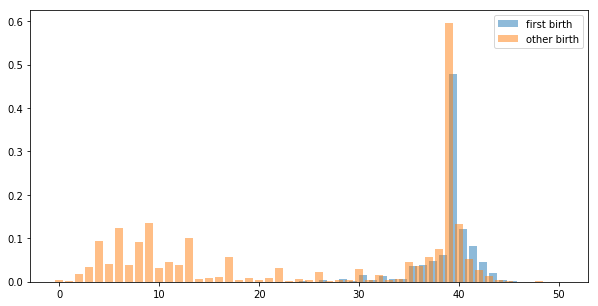

In [35]:
 plt.figure(figsize=(10,5))
# plt.hist(x=[first_birth_prob,other_birth_prob],label=['first birth','other birth'])
plt.bar(first_birth_dict.keys(),first_birth_dict.values(),alpha=0.5,align='edge',label='first birth')

plt.bar(other_birth_dict.keys(),other_birth_dict.values(),alpha=0.5,align='center',label='other birth')
plt.legend()

# plt.xticks(range(first_birth_dict.keys()), list(first_birth_dict.keys()))
# plt.legend()

Text(0.5, 1.0, 'other birth')

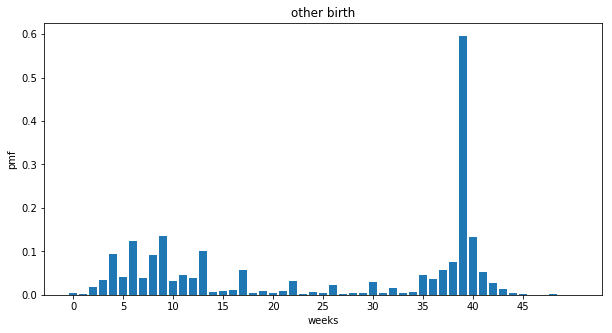

In [13]:
plt.figure(figsize=(10,5))
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.bar(other_birth_dict.keys(),other_birth_dict.values(),align='center')
plt.xlabel('weeks')
plt.ylabel('pmf')
plt.title('other birth')

Text(0.5, 1.0, 'first birth')

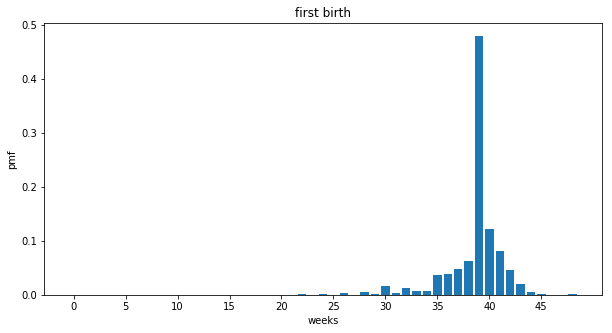

In [14]:
plt.figure(figsize=(10,5))
plt.xticks([0,5,10,15,20,25,30,35,40,45])
plt.bar(first_birth_dict.keys(),first_birth_dict.values(),align='center')
plt.xlabel('weeks')
plt.ylabel('pmf')
plt.title('first birth')

# Visualizing data based on difference between pmf

In [19]:
weeks= np.arange(30,50)

In [20]:
weeks

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49])

In [24]:
#Calculate difference between pmf of first and other pregency period and convert into percentage
difference=[];
p_first_birth=0
p_other_birth=0

for key in weeks:
    value=first_birth_dict.get(key)
    if(value is not None):
        p_first_birth=value
    else:
        p_first_birth=0
    
    value=other_birth_dict.get(key)
    if(value is not None):
        p_other_birth=value
    else:
        p_other_birth=0
        
    diff=(p_first_birth-p_other_birth)*100
    difference.append(diff)
    


Text(0, 0.5, 'difference between pmf')

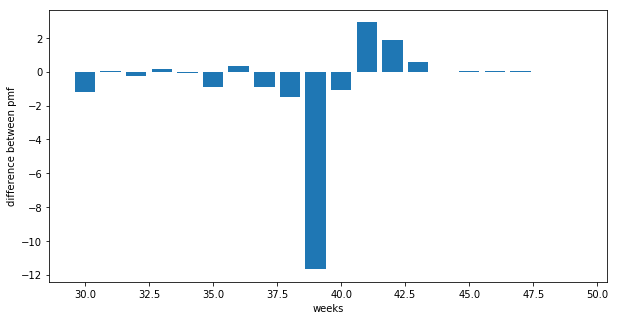

In [30]:
plt.figure(figsize=(10,5))
plt.bar(x=weeks,height=difference)
plt.xlabel('weeks')
plt.ylabel('difference between pmf')